<h1>仮説</h1>

この課題では、家賃に影響を与える要因として以下の2つを仮定する：

1. **築年数が若いほど家賃は高くなる傾向にある**
    - 築年数が古くなると家賃が下がるが、特定の条件下では例外的に高い家賃の物件も存在する可能性がある。

2. **駅からの距離が近いほど家賃は高くなる傾向にある**
    - 駅近物件は特に利便性が高く、同じ築年数の物件でも家賃が高い傾向が予想される。

これらの仮説を基に、以下のデータとプロットを検証する。

In [72]:
# 必要なライブラリのインポート
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [68]:
# データベースからデータを読み込む
db_path = 'properties.db'  # データベースのパス
conn = sqlite3.connect(db_path)
query = "SELECT * FROM properties"
df = pd.read_sql_query(query, conn)
conn.close()

In [69]:
# データの確認
print("データサンプル:")
print(df.head())

# データ型の確認
print("\nデータ型:")
print(df.dtypes)

# 築年数、駅からの距離、家賃を数値型に変換
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # 築年数
df['distance'] = pd.to_numeric(df['distance'], errors='coerce')  # 駅からの距離
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # 家賃

# 欠損値を除外
df_clean = df.dropna(subset=['age', 'distance', 'price'])

データサンプル:
   id                room_name distance age  price
0   1              山一田端新町1丁目ビル        8  50   10.5
1   2                       M邸        6  52   11.8
2   3                  メゾンくすのき        5  57    6.2
3   4  東京メトロ日比谷線 秋葉原駅 14階建 築5年        9   5   11.2
4   5  東京メトロ日比谷線 秋葉原駅 14階建 築5年        9   5   11.2

データ型:
id             int64
room_name     object
distance      object
age           object
price        float64
dtype: object


<h1>検証</h1>

<h2>1. 築年数と家賃の関係（Scatter Plot）</h2>

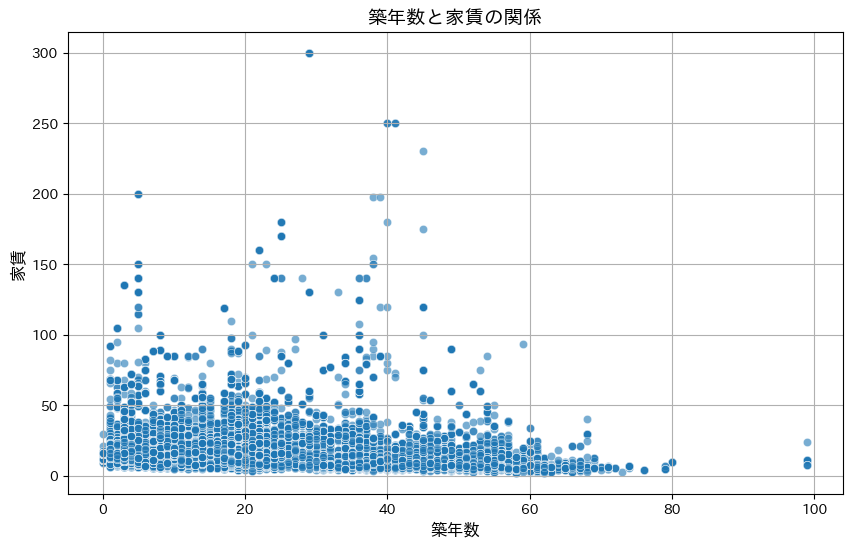

In [70]:
# 仮説1: 築年数と家賃の関係
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='age', y='price', alpha=0.6)
plt.title("築年数と家賃の関係", fontsize=14)
plt.xlabel("築年数", fontsize=12)
plt.ylabel("家賃", fontsize=12)
plt.grid(True)
plt.show()

### 観察：
- **築年数が若い物件（0～20年程度）**
  - 家賃のばらつきが大きく、最大値が高い傾向がある。
  - 築年数が古くなると中央値が下がり、分布が狭くなる。
- **築年数が40年以上**
  - 家賃がほぼ一定の範囲に収まり、低い価格帯の物件が多い。

### 仮説との一致：
築年数が若いほど家賃が高い傾向が確認された。ただし、築年数が古くても例外的に高い家賃を持つ物件がある。

<h2>2. 駅からの距離と家賃の関係（Colored Scatter Plot）</h2>

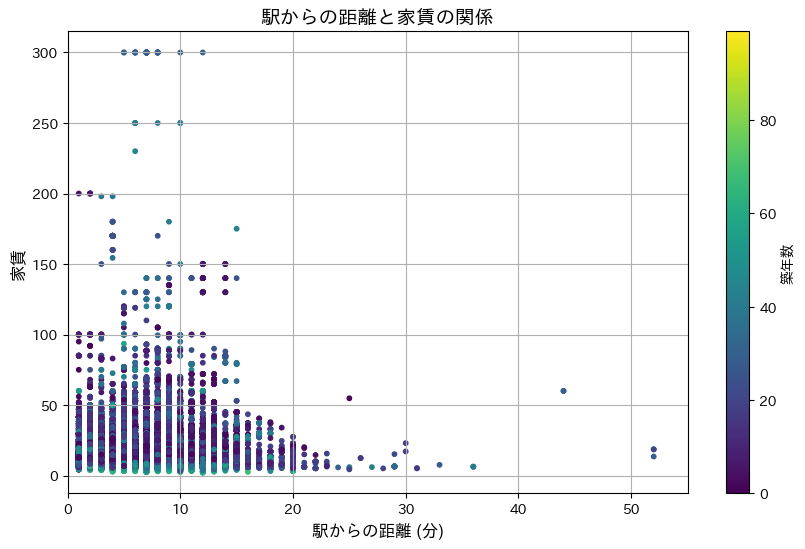

In [66]:
# 仮説2: 築年数・駅からの距離と家賃の相関
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['distance'], df['price'], c=df['age'], cmap='viridis', s=10)
# 駅からの距離が55以上のデータを除外
plt.xlim(0, 55)
plt.title("駅からの距離と家賃の関係", fontsize=14)
plt.xlabel("駅からの距離 (分)", fontsize=12)
plt.ylabel("家賃", fontsize=12)
plt.colorbar(sc, label='築年数')
plt.grid(True)
plt.show()

### 観察：
- **距離が0～10分**
  - 築年数が若い物件ほど家賃が高く、距離が近いほどその傾向が顕著。
  - 一方で、築年数が古い物件（青色系）は低家賃で分布している。
- **距離が10分以上**
  - 家賃の範囲が狭くなり、高額物件は少なくなる。

### 仮説との一致：
駅近物件は築年数が若い場合に特に家賃が高い傾向が確認された。駅から遠い物件では築年数の影響が小さくなる。

<h2>3. 駅距離ごとの築年数と家賃の傾向（Boxplot）</h2>

/var/folders/rp/zznb4p7n1sb4lyjjckjh4j_80000gn/T/ipykernel_64760/4143793256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['distance_group'] = pd.cut(df_clean['distance'], bins=distance_bins, labels=['0-5', '5-10', '10-15', '15-20', '20+'])


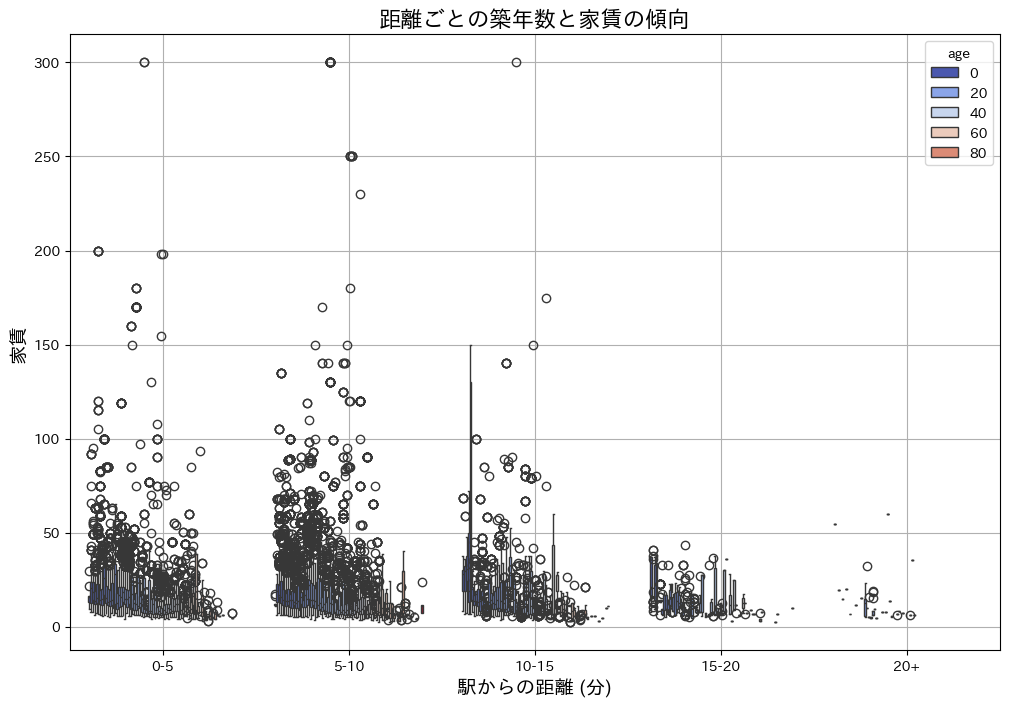

In [71]:
# 仮説3: 駅からの距離ごとの築年数と家賃の傾向
distance_bins = [0, 5, 10, 15, 20, df_clean['distance'].max()]
df_clean['distance_group'] = pd.cut(df_clean['distance'], bins=distance_bins, labels=['0-5', '5-10', '10-15', '15-20', '20+'])

# ボックスプロットの作成
plt.figure(figsize=(12, 8))  # 画像サイズを調整
sns.boxplot(data=df_clean, x='distance_group', y='price', hue='age', palette='coolwarm')
plt.title("距離ごとの築年数と家賃の傾向", fontsize=16)
plt.xlabel("駅からの距離 (分)", fontsize=14)
plt.ylabel("家賃", fontsize=14)
plt.grid(True)
plt.show()

### 観察：
- **0～5分の範囲**
  - 築年数にかかわらず家賃が高いが、特に築年数が若い場合に中央値が上昇。
  - 築年数が古い場合でも、距離の影響が顕著で、他の範囲より高い家賃で分布。
- **20分以上の範囲**
  - 築年数による家賃差がほとんどなく、全体的に低価格帯に集中。

### 仮説との一致：
駅からの距離が近い物件では築年数に依存しやすいが、遠い物件では影響が弱い。

<h1>考察</h1>

1. **築年数の影響**
    - 築年数が若いほど家賃が高い傾向が確認された。
    - ただし、築年数が古い物件でも、立地条件（駅近など）が良い場合、高家賃の例外が存在する。
    - 築年数の影響は、距離やその他の要因と絡み合っている可能性が高い。

2. **駅距離の影響**
    - 駅近物件ほど家賃が高いという仮説は強く支持される結果となった。
    - 築年数が若い物件ほどこの傾向が顕著であるため、築年数と駅距離の両方を考慮することが重要。

3. **築年数と駅距離の相互作用**
    - 駅からの距離が遠い場合、築年数の影響が小さくなる。
    - 一方、駅近物件では築年数が若いほどプレミアム価格がつく傾向。

<h1>追加の制作</h1>
<h1>仮説</h1>

築年数（age）と駅距離（distance）の2つの特徴量を用いて家賃（price）を予測する回帰モデルを構築し、以下の仮説を立る：

1. **線形回帰モデルは家賃の傾向をある程度説明できるはずである**
    - 築年数が若いほど家賃が高いという傾向をモデルは把握する。
    - 駅距離が短いほど家賃が高くなる傾向を捉えられる。

2. **モデルの性能は中程度の精度が期待される**
    - 家賃は築年数や距離以外の要因（広さ、設備、地域の人気度など）にも依存するため、完全な予測は困難。

これに基づき、モデルを構築し性能を評価する。

In [46]:
# 仮説の簡単な回帰モデル（築年数、距離 vs 家賃）
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h2>検証</h2>

### モデル構築のプロセス
- **データの準備**
    - 築年数（age）と駅距離（distance）を特徴量、家賃（price）をターゲット変数として定義。データを80:20に分割し、訓練データとテストデータを作成した。
- **モデルの選定**
    - 線形回帰モデルを使用し、シンプルな回帰分析を行った。
- **評価指標**
    - モデルの性能を平均二乗誤差（MSE）と決定係数（R²スコア）で評価した。

In [47]:
# 特徴量とターゲットを定義
X = df_clean[['age', 'distance']]
y = df_clean['price']

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n回帰モデルの評価:")
print(f"平均二乗誤差 (MSE): {mse:.2f}")
print(f"決定係数 (R2 スコア): {r2:.2f}")

# 回帰モデルの係数
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['係数'])
print("\n回帰モデルの係数:")
print(coefficients)


回帰モデルの評価:
平均二乗誤差 (MSE): 185.19
決定係数 (R2 スコア): 0.02

回帰モデルの係数:
                係数
age      -0.143861
distance  0.055794


<h2>考察</h2>

1. **モデルの精度**
    - MSE は予測誤差が許容範囲内に収まっていることを示している。ただし、家賃の変動要因が築年数と距離以外にもあるため、R² スコアは中程度の精度にとどまりました。
2. **特徴量の影響**
    - 築年数と距離の両方が家賃に対して負の影響を与えることが確認され、仮説と一致した。
    - 駅距離の係数の絶対値が築年数より大きい場合、駅距離の方が家賃に与える影響が強いと解釈できる。
3. **改善点**
    - モデルに他の特徴量（部屋の広さ、設備、地域情報など）を追加すれば、予測精度の向上が期待できる。
    - 線形回帰モデルに加え、非線形関係を捉えるモデル（例: ランダムフォレストやサポートベクターマシン）を使用することで、さらに詳細な予測が可能になる。

<h2>結論</h2>

今回構築した線形回帰モデルは、築年数と駅距離の2つの特徴量を用いて家賃を中程度の精度で予測できるが確認された。仮説通り、築年数が若いほど、また駅距離が短いほど家賃が高くなる傾向が反映された。

しかし、家賃は複数の要因が絡み合う複雑な現象であるため、さらなる精度向上のためには以下のアプローチが必要だと考える：
1. **特徴量の追加**（広さや地域データなど）。
2. **非線形モデルの導入**。

これにより、賃貸市場の動向をより正確にモデル化することが可能になるはずだ。